In [38]:
import pickle 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [2]:
with open('./pickles/new_modeling_df.p', 'rb') as read_file:
    new_modeling_df=pickle.load(read_file)

In [34]:
new_modeling_df.shape

(200, 42)

In [4]:
new_modeling_df.columns

Index(['age', 'ff_rush_att', 'ff_rush_yds', 'ff_ypc', 'ff_rush_td',
       'ff_rec_tgt', 'ff_rec', 'ff_rec_yds', 'ff_rec_td', 'snapshare',
       'opp_share', 'shotgun_pct', 'under center_pct', 'stacked_front',
       'base_front', 'light_front', 'jukerate', 'tck_evad', 'tot_yds_ctd',
       'yds_ctd_gm', 'breakaway_tot', 'breakaway_rate', 'fan_pts_att',
       'fan_pts_tgt', 'fan_pts_opp', 'tot_dps', 'drops_rate', 'ff_fum',
       'ff_fum_lst', 'rz_rush_att', 'rz_rush_yds', 'rz_rush_td', 'rz_rec_tgt',
       'rz_rec', 'rz_rec_yds', 'rz_rec_td', 'rz_fum', 'rz_fum_lst', 'rz_ppg',
       'rz_fpts', 'pos_rk', 'target'],
      dtype='object')

0     1.05
1     0.80
2     0.72
3     1.42
4     0.88
      ... 
74    0.68
75    0.67
76    0.47
77    0.66
78    0.50
Name: fan_pts_opp, Length: 200, dtype: float64

In [6]:
y = new_modeling_df['target']
X = new_modeling_df.drop(columns='target', axis=1)




training, testing, train_labels, test_labels = train_test_split(X, y, random_state=0)


logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')


model_log = logreg.fit(training, train_labels)


model_log



/opt/anaconda3/envs/Fantasy_Football/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [19]:
training.shape

(150, 41)

(50, 41)

In [8]:
y_hat_train = logreg.predict(training)
y_hat_test = logreg.predict(testing)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        55

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



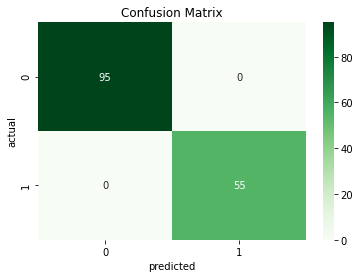

In [31]:
def evaluation(train_labels, y_hat_train, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(train_labels, y_hat_train)
    print(classification_report(train_labels, y_hat_train))
    sns.heatmap(cm,  cmap= 'Greens', annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

evaluation(train_labels, y_hat_train)

In [36]:
def precision(train_labels, y_hat_train):
 
    train_lables_y_hat_train = list(zip(train_labels, y_hat_train))
    tp = sum([1 for i in train_lables_y_hat_train if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in train_lables_y_hat_train if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

precision(train_labels, y_hat_train)

1.0

In [43]:
train_labels_score = logreg.decision_function(training)
test_labels_score = logreg.decision_function(testing)

train_fpr, train_tpr, train_thresholds = roc_curve(train_labels_score, train_labels)
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels_score, test_labels)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: continuous format is not supported